# Storytelling Data Visualization on Exchange Rates

## Introducing the Dataset

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. Note that the dataset gets regular updates - we need to reduce it to January 2021 (the ending of Donald Trump's presidential term).

The data source is the European Central Bank: [data set was put together by Daria Chemkaeva.](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020)

In [262]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-06-15,1.5051,1.9558,5.3164,1.3498,1.0435,7.0013,NaN,24.703,7.4392,...,4.9427,NaN,10.6278,1.4519,NaN,NaN,36.5290,18.0465,1.0431,16.7111
1,2022-06-14,1.5174,1.9558,5.3329,1.3522,1.0394,7.0417,NaN,24.749,7.4403,...,4.9443,NaN,10.6220,1.4541,NaN,NaN,36.5660,18.0600,1.0452,16.7959
2,2022-06-13,1.4998,1.9558,5.2785,1.3435,1.0375,7.0434,NaN,24.724,7.4397,...,4.9459,NaN,10.6160,1.4538,NaN,NaN,36.4250,18.0495,1.0455,16.8070
3,2022-06-10,1.4845,1.9558,5.1718,1.3484,1.0404,7.0868,NaN,24.705,7.4389,...,4.9442,NaN,10.5255,1.4620,NaN,NaN,36.7740,18.0116,1.0578,16.5209
4,2022-06-09,1.4985,1.9558,5.2506,1.3506,1.0495,7.1722,NaN,24.689,7.4391,...,4.9453,NaN,10.5045,1.4779,NaN,NaN,37.0790,18.5104,1.0743,16.4132


In [263]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6063,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6064,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6065,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6066,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6067,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [264]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6068 non-null   object 
 1   [Australian dollar ]      6068 non-null   object 
 2   [Bulgarian lev ]          5666 non-null   object 
 3   [Brazilian real ]         5800 non-null   object 
 4   [Canadian dollar ]        6068 non-null   object 
 5   [Swiss franc ]            6068 non-null   object 
 6   [Chinese yuan renminbi ]  5800 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6068 non-null   object 
 9   [Danish krone ]           6068 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6068 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6068 non-null   object 
 14  [Croatia

Our focus will be on exchange rate only between the euro and the American dollar.

## Data Cleaning

In [265]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [266]:
euro_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1268     7
          ..
1.5196     1
0.9327     1
1.0421     1
1.2801     1
1.5885     1
Name: US_dollar, Length: 3618, dtype: int64

There are 62 "-" wrong characters. We'll drop the rows containing them.

In [267]:
euro_dollar = euro_dollar[euro_dollar['US_dollar'] != '-']
euro_dollar['US_dollar'] = euro_dollar['US_dollar'].astype(float)
euro_dollar = euro_dollar[euro_dollar['Time'] < "01.01.2021"]  # Reducing to Jan 2021
euro_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5632 entries, 0 to 5693
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5632 non-null   datetime64[ns]
 1   US_dollar  5632 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.0 KB


Now that we've finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

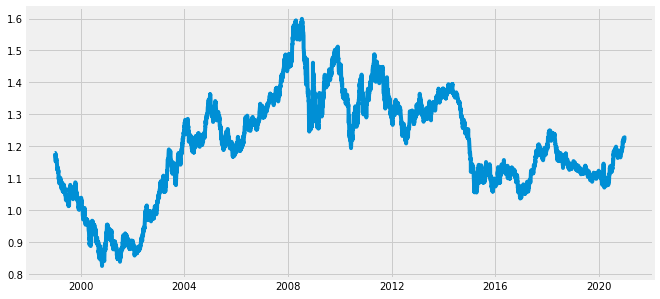

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.plot(euro_dollar['Time'], euro_dollar['US_dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles - rather than seeing a smooth line. The wiggles are the visual representation of the daily variation in the exchange rate. The clear upward or downward trends are shown only in the longer run (months or years).

## Rolling Mean

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the **rolling mean** (also known as moving average).

Below, we see how our plot changes visually as we increase the rolling window. The window gets larger, and the line becomes smoother. This increases the data-ink ratio, and it can be useful if we want the audience to focus only on long-term trends.

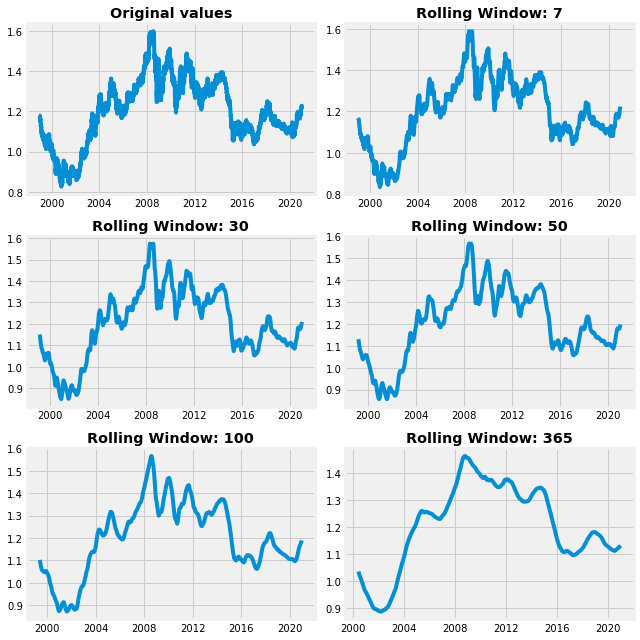

In [269]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 2, 1)
plt.plot(euro_dollar['Time'], euro_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_dollar['Time'],
             euro_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window: ' + str(rolling_mean), weight='bold')
    
plt.tight_layout()
plt.show()

In [270]:
euro_dollar['rolling_mean'] = euro_dollar['US_dollar'].rolling(30).mean()

## Coming up with an Idea

Our goal is to create a storytelling data visualization using the data we have. 

To create a story, we need to arrange our data into a series of events that show change.

Here are few story ideas for our data:
- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.


- We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.


- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

First, we need to choose the right graph type which should give our story the visual form it needs - we don't want to choose a histogram for a time series. Equally important, we need to choose something that our audience will be familiar with.

Next, we're going to sketch the graph before writing the code. In sketching it's important to use some of the design principles:
- Maximizing the data-ink ratio
- Creating visual patterns using Gestalt principles
- Guiding the audience's attention using pre-attentive attributes

Now that we have a good idea of the story we want to tell and how it's going to look, we'll start coding.

## Financial Crisis Visualization

In [271]:
financial_crisis = euro_dollar.copy()[(euro_dollar['Time'].dt.year >= 2006) & \
                                      (euro_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_dollar.copy()[(euro_dollar['Time'].dt.year >= 2007) & \
                                             (euro_dollar['Time'].dt.year <= 2008)]

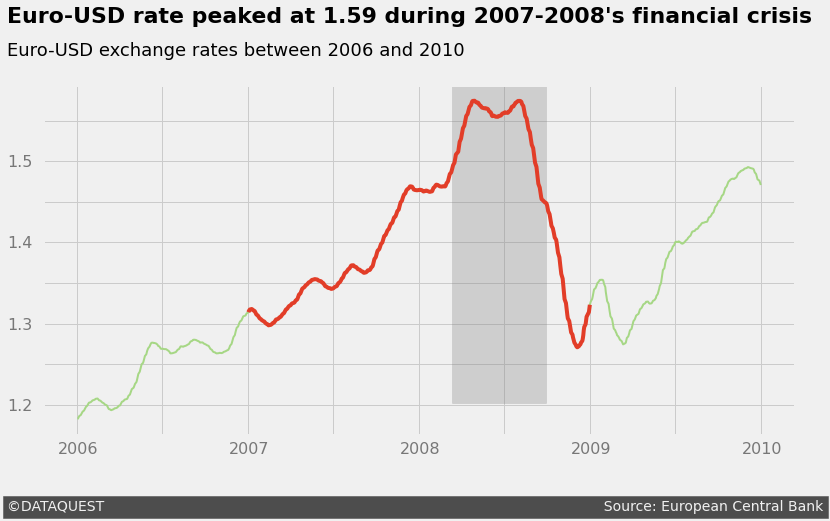

In [272]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=2, color='#a6d785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=4, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=13950.0, xmax=14150.0, ymin=0.09,
           alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13108.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.14, year, alpha=0.5, fontsize=16)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13000.0, y, rate, alpha=0.5, fontsize=16)
    y += 0.1

### Adding a title and a subtitle    
ax.text(13000.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold', size=22)
ax.text(13000.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010', size=18)

### Adding a signature
ax.text(13000.0, 1.07, '©DATAQUEST' + ' '*111 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=14)

plt.show()

## The US Presidencies Visualization

In [273]:
bush_obama_trump = euro_dollar.copy()[(euro_dollar['Time'].dt.year >= 2001) & \
                                         (euro_dollar['Time'].dt.year < 2021)]

bush = bush_obama_trump.copy()[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2009) & \
                                (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2017)]

<ipython-input-286-261dc0f2a6b1>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'],
<ipython-input-286-261dc0f2a6b1>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'],
<ipython-input-286-261dc0f2a6b1>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'],


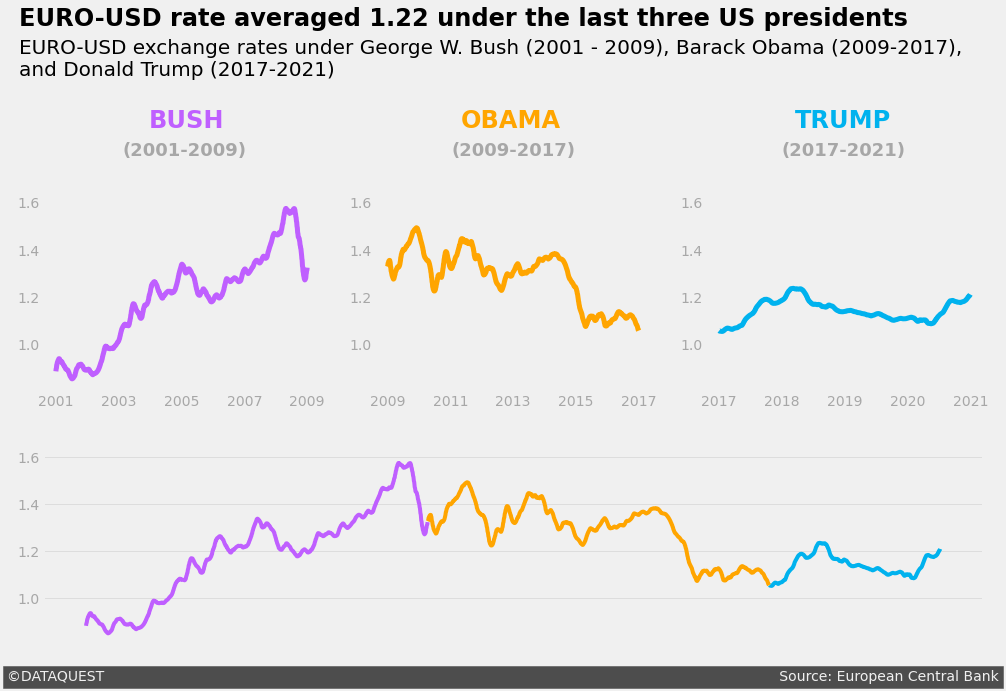

In [286]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='#bf5fff', linewidth=5)
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'],
                   alpha=0.3)
ax1.text(12400.0, 1.92, 'BUSH', fontsize=24, weight='bold', color='#bf5fff')
ax1.text(12100.0, 1.8, '(2001-2009)', weight='bold', alpha=0.3, fontsize=18)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='#ffa500', linewidth=5)
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'],
                   alpha=0.3)
ax2.text(15100.0, 1.92, 'OBAMA', fontsize=24, weight='bold', color='#ffa500')
ax2.text(14990.0, 1.8, '(2009-2017)', weight='bold', alpha=0.3, fontsize=18)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='#00b2ee', linewidth=5)
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'],
                   alpha=0.3)
ax3.text(17610.0, 1.92, 'TRUMP', fontsize=24, weight='bold', color='#00b2ee')
ax3.text(17530.0, 1.8, '(2017-2021)', weight='bold', alpha=0.3, fontsize=18)

### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'], color='#bf5fff')
ax4.plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'], color='#00b2ee')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(10900.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=24, weight='bold')
ax1.text(10900.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=20)

### Adding a signature
ax4.text(10650.0, 0.65, '©DATAQUEST' + ' '*150 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()

In this project, we created a storytelling data visualization using the following workflow:
- We started by exploring and cleaning the data
- We brainstormed ideas for storytelling data visualizations and chose couple
- We sketched our data visualization
- We coded the sketched data visualization